In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
# Load and show dataset
dataset_path = "Housing.csv"
df = pd.read_csv(dataset_path)
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [14]:
#Preprocessing objects columns
# Extract object datatype columns
object_columns = df.select_dtypes(include=['object']).columns.to_list()

#preprocessing object columns
ordinal_encoder = OrdinalEncoder()
df[object_columns] = ordinal_encoder.fit_transform(df[object_columns])

normalizer = StandardScaler()
df_norm = normalizer.fit_transform(df)
df_norm.shape, df_norm

((545, 13),
 array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.51769249,
          1.80494113, -1.40628573],
        [ 4.00448405,  1.75700953,  1.40341936, ...,  2.67940935,
         -0.55403469, -1.40628573],
        [ 4.00448405,  2.21823241,  0.04727831, ...,  1.51769249,
          1.80494113, -0.09166185],
        ...,
        [-1.61432675, -0.70592066, -1.30886273, ..., -0.80574124,
         -0.55403469,  1.22296203],
        [-1.61432675, -1.03338891,  0.04727831, ..., -0.80574124,
         -0.55403469, -1.40628573],
        [-1.61432675, -0.5998394 ,  0.04727831, ..., -0.80574124,
         -0.55403469,  1.22296203]]))

In [74]:
# split dataset
TEST_SIZE = 0.3
RANDOM_STATE = 1
X, y = df_norm[:, 1:], df_norm[:, 0]

results = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
X_train.shape, X_test.shape


((381, 12), (164, 12))

Decision Tree Regressor evaluation:
Mean Squared Error: 0.72
Mean Absolute Error: 0.59


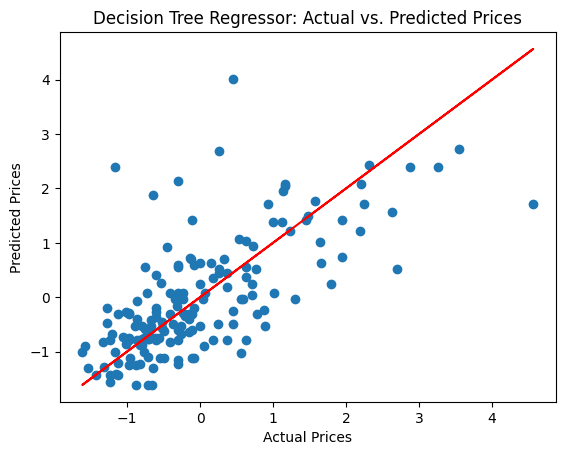

In [75]:
# define models for decision tree regressor
decision_tree_rgs = DecisionTreeRegressor(random_state=RANDOM_STATE)

# fit models
decision_tree_rgs.fit(X_train, y_train)

# predict and evaluate
y_pred = decision_tree_rgs.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
results.append((mse, mae))

print("Decision Tree Regressor evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# plot prediction and actual values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree Regressor: Actual vs. Predicted Prices")
plt.show()

Random Forest Regressor evaluation:
Mean Squared Error: 0.38
Mean Absolute Error: 0.46


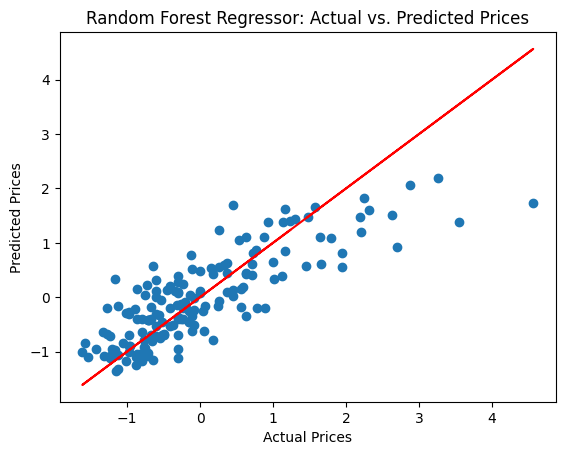

In [76]:
# define models for decision tree regressor
random_forest_rgs = RandomForestRegressor(random_state=RANDOM_STATE)

# fit models
random_forest_rgs.fit(X_train, y_train)

# predict and evaluate
y_pred = random_forest_rgs.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
results.append((mse, mae))

print("Random Forest Regressor evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# plot prediction and actual values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest Regressor: Actual vs. Predicted Prices")
plt.show()

Ada Boost Regressor evaluation:
Mean Squared Error: 0.58
Mean Absolute Error: 0.58


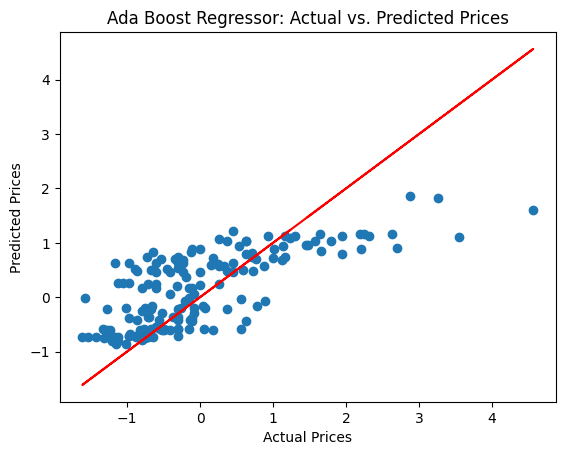

In [77]:
# define models for decision tree regressor
ada_boost_rgs = AdaBoostRegressor(random_state=RANDOM_STATE)

# fit models
ada_boost_rgs.fit(X_train, y_train)

# predict and evaluate
y_pred = ada_boost_rgs.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)

results.append((mse, mae))

print("Ada Boost Regressor evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# plot prediction and actual values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Ada Boost Regressor: Actual vs. Predicted Prices")
plt.show()
    
    

Gradient Boost Regressor evaluation:
Mean Squared Error: 0.40
Mean Absolute Error: 0.45


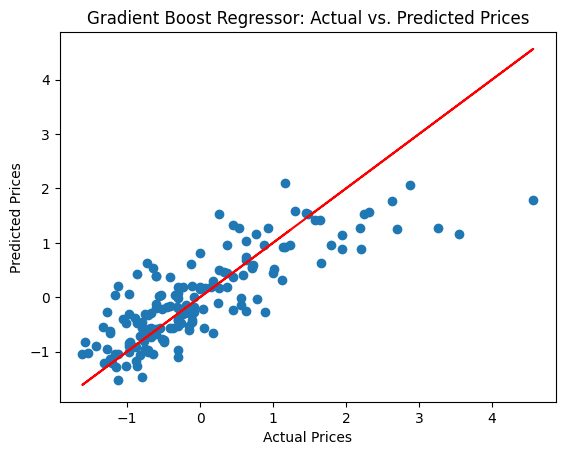

In [78]:
# define models for decision tree regressor
gradient_boost_rgs = GradientBoostingRegressor(random_state=RANDOM_STATE)

# fit models
gradient_boost_rgs.fit(X_train, y_train)

# predict and evaluate
y_pred = gradient_boost_rgs.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)

results.append((mse, mae))

print("Gradient Boost Regressor evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# plot prediction and actual values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Gradient Boost Regressor: Actual vs. Predicted Prices")
plt.show()

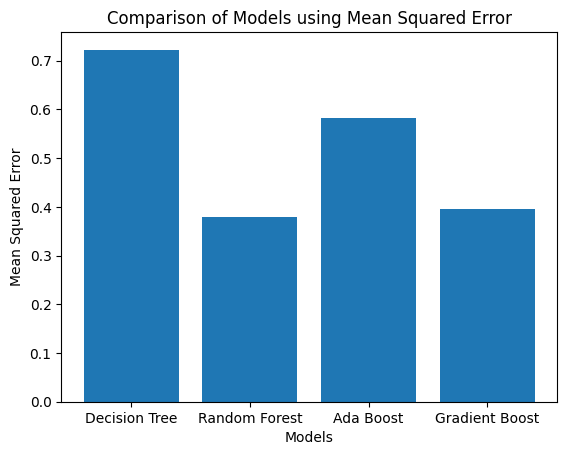

In [80]:
#plot comparison of models
plt.bar(["Decision Tree", "Random Forest", "Ada Boost", "Gradient Boost"], [result[0] for result in results])
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("Comparison of Models using Mean Squared Error")
plt.show()

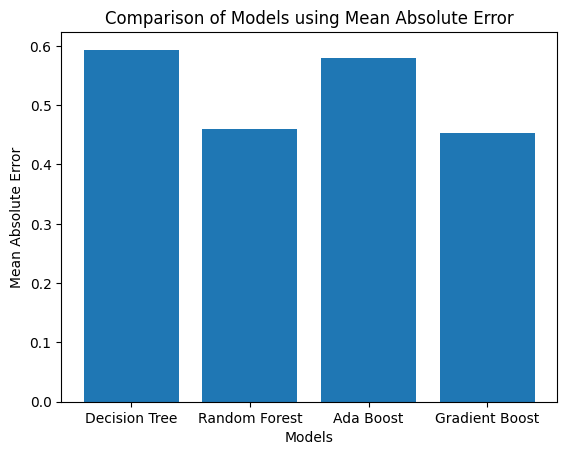

In [81]:
#plot comparison of models
plt.bar(["Decision Tree", "Random Forest", "Ada Boost", "Gradient Boost"], [result[1] for result in results])
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.title("Comparison of Models using Mean Absolute Error")
plt.show()